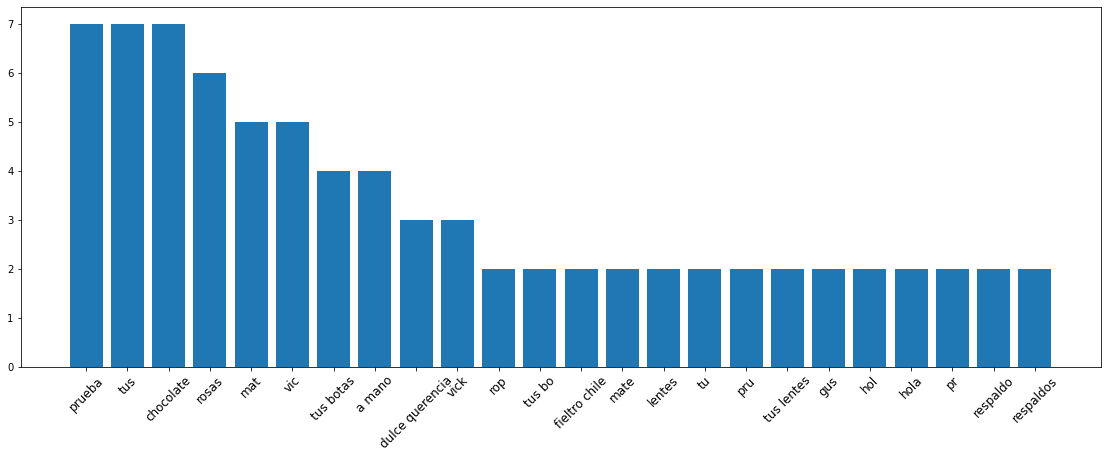

In [1]:
from app.methods.authorization import get_token
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import pickle

token = get_token()
queries_logs_url = "https://kong.aliad.as/action-logs/logs_query/products/queries"

headers = {
  "Authorization": token,
}
params = {
  "page": 0,
  "per_page": 1000,
}
response = ""
queries_dict = {}
while( response != [] ):
  response = requests.get(queries_logs_url, headers=headers, params=params).json()
  if isinstance(response, str): 
    print("auth error")
    exit(0) 
  for log in response:
    query_text = log['query'].lower()
    if len(query_text) > 1:
        if query_text not in queries_dict: 
          queries_dict[query_text] = 0
        queries_dict[query_text] += 1
  params["page"] += 1

queries_freq = sorted(queries_dict.items(), key= lambda item: item[1])
queries_freq.reverse()

queries = []
freqs = []

for query, freq in queries_freq:
    if freq == 1: break
    queries.append(query)
    freqs.append(freq)

fig = plt.figure()
fig.set_size_inches(15, 5)
ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=45, size=12)

ax.bar(queries,freqs)
plt.show()

In [2]:
tokenSpree = "dec9c83c0a355bc48df9b0d53916eadf2de1c8cd489603b7"
url_vendors = "https://ecommerce-api.lc-ip81.inf.utfsm.cl/api/v1/vendors"

headers = {
    "Content-Type": "application/json",
    "X-Spree-Token": tokenSpree,
}
params = {
  "page": 1,
  "per_page": 1000,
}

response = ""
vendors_dict = {}

response = requests.get(url_vendors, headers=headers, params=params).json()
for vendor in response['vendors']:
    url_vendor_products = "https://ecommerce-api.lc-ip81.inf.utfsm.cl/api/v1/vendors/" + str(vendor['id']) + "/products"
    response = requests.get(url_vendor_products, headers=headers, params=params).json()
    vendors_dict[vendor['name']] = response['count']

C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 127851 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\

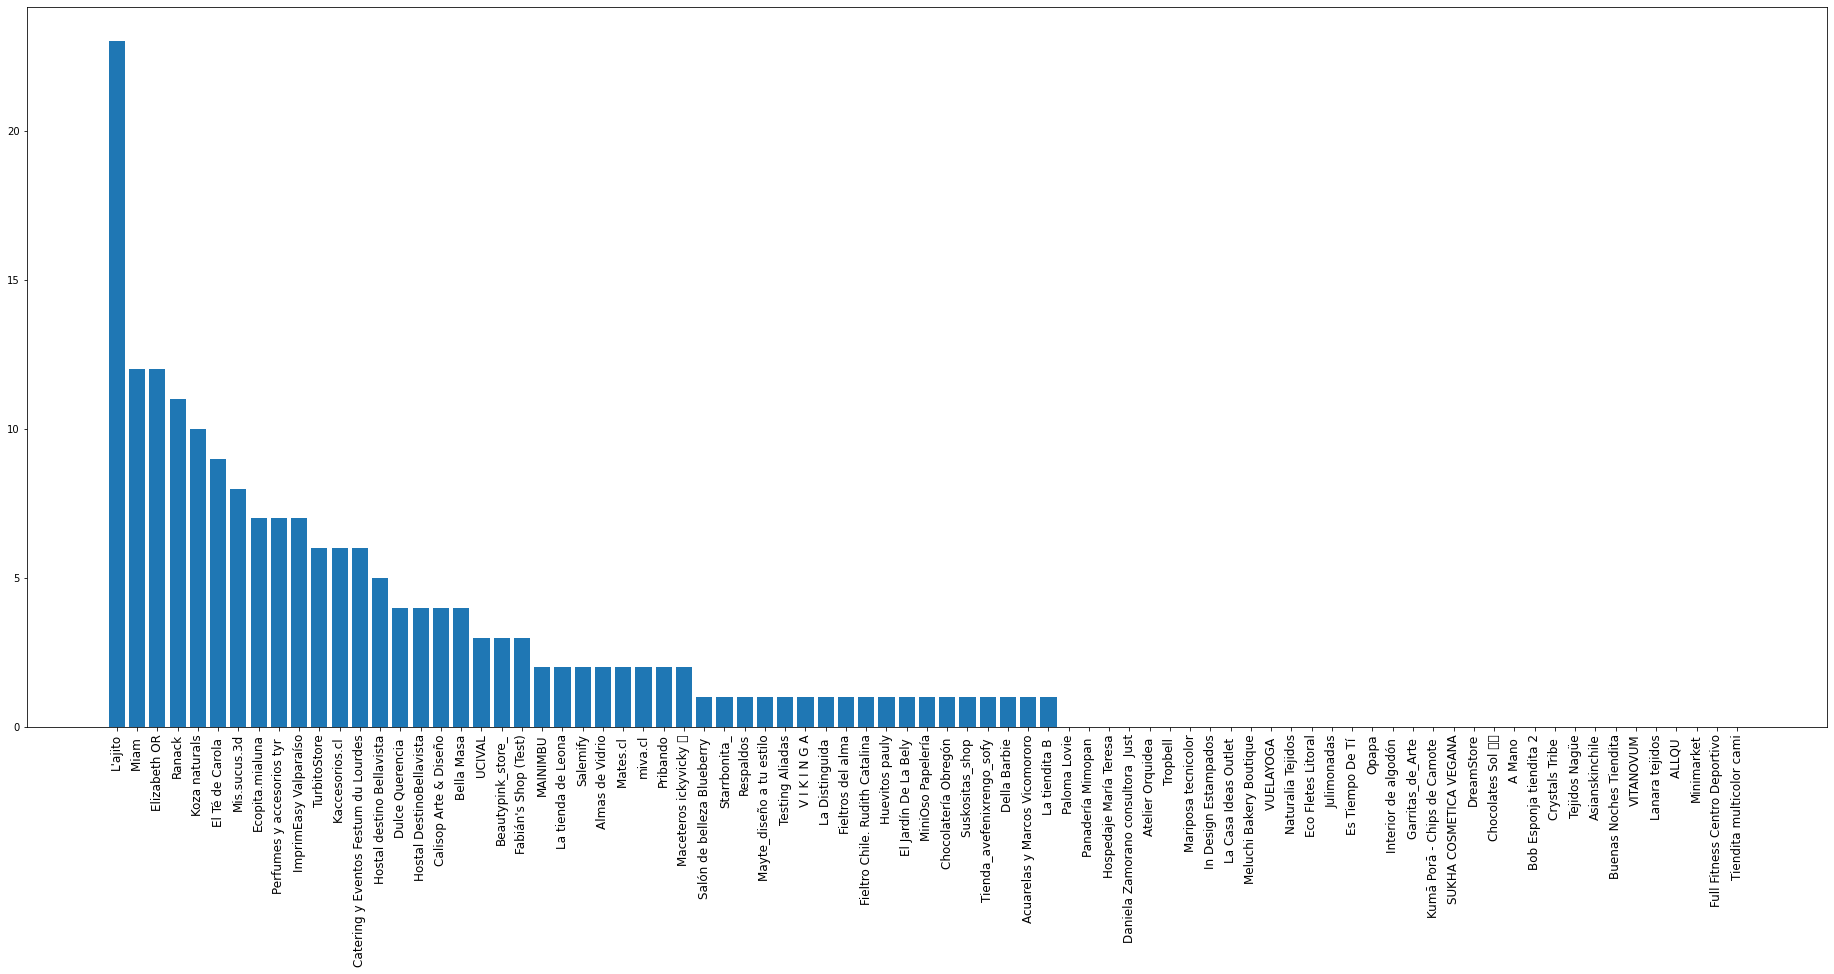

In [3]:
n_products = sorted(vendors_dict.items(), key= lambda item: item[1])
n_products.reverse()

vendors = []
products = []

for v, p in n_products:
    vendors.append(v)
    products.append(p)

fig = plt.figure()
fig.set_size_inches(25, 10)
ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=90, size=12)

ax.bar(vendors,products)
plt.show()

In [4]:
total_vendors = len(vendors)
total_products = sum(products)
zero_products_vendors = 0
products_vendors_1_5 = 0
products_vendors_6_10 = 0
products_vendors_11_more = 0

for n in products:
    if n == 0: zero_products_vendors += 1
    elif n < 6: products_vendors_1_5 += 1
    elif n < 11: products_vendors_6_10 += 1
    else: products_vendors_11_more += 1

today = datetime.now()
print(
    f"{'Data date: '}{today}\n\n"
    f"{'Total vendors:':<25}{total_vendors:>10}\n"
    f"{'Total products:':<25}{total_products:>10}\n"
    f"{'zero products vendors:':<25}{zero_products_vendors:>10}\n"
    f"{'(1-5) products vendors:':<25}{products_vendors_1_5:>10}\n"
    f"{'(6-10) products vendors:':<25}{products_vendors_6_10:>10}\n"
    f"{'(>10) products vendors:':<25}{products_vendors_11_more:>10}\n"
)

Data date: 2021-09-01 14:43:49.047405

Total vendors:                   81
Total products:                 188
zero products vendors:           34
(1-5) products vendors:          34
(6-10) products vendors:          9
(>10) products vendors:           4



In [6]:
import spacy
POS_tagger = spacy.load('es_dep_news_trf')

with open('app/files/products/top_vocabulary.pkl', "rb") as file:
  top_vocabulary = pickle.load(file)
  file.close()


negro


In [13]:
tagged_words = POS_tagger(' '.join(top_vocabulary))
top_nouns = [word for word in tagged_words if word.pos_ == 'NOUN']

print(top_nouns)
top_100_queries = top_nouns[:100]

[negro, ajo, pasta, preparaciones, frasco, eleccion, grs, carnes, toque, blanco, mano, colores, macetero, valor, aceite, agua, resina, gramos, infusion, llavero, cascara, beneficios, valparaiso, victorias, lilas, cms, cartera, dia, ayuda, piel, chocolate, fria, cafe, azucar, linea, regalo, web, manzana, diseno, top, talla, vitamina, vegano, semillas, collar, merken, miel, prueba, habitacion, color, centro, naranja, tortas, productos, maceta, plata, materiales, aros, sal, tomillo, menta, oliva, dientes, tazas, bebida, sabor, bolsa, ansiedad, kilo, servicio, aroma, acido, leche, comedor, producto, copa, hijos, festum, eventos, manos, llaveros, anillo, calidad, pulseras, cuello, corte, eco, cuero, mochila, jengibre, limon, mermeladas, vidrio, colesterol, curcuma, romero, hora, noche, sistema, cuellos, test, telas, serum, ademas, forma, tipo, base, fragancias, pieles, rostro, ricino, pestanas, bano, vista, uso, papel, pan, sabores, mujeres, anos, variedades, catalogo, www, cl, carcasa, cri